In [1]:
import lib
import pywt
import numpy as np

In [2]:
def mse(A, B):
    return ((A - B) ** 2).mean()

In [3]:
def create_random_M_x_M_matrix( m, type_ ):
    return (np.random.random(m * m).reshape(64,64) * 100).astype(type_)

In [4]:
exmpl = create_random_M_x_M_matrix(64, int)

In [5]:
X, Y = lib.fried_model_gradient(exmpl)
X_H, Y_H = lib.Hudgin_gradien_model(exmpl)

In [6]:
LH = dict()
my_LH = dict()

In [7]:
LH[5] = pywt.dwt2(exmpl, 'haar')[1][0]

In [8]:
my_LH[5] = -lib.GetLH(m=1, Y=Y).T

In [9]:
mse(my_LH[5], LH[5])

1.266370920066279e-28

In [10]:
def compare_LH_HL(matrix):
    M = int(np.log2(len(matrix)))
    X, Y = lib.fried_model_gradient(matrix)
    buf = matrix
    LH = dict()
    my_LH = dict()
    HL = dict()
    my_HL = dict()
    mse_res = dict()
    for i in range(M)[::-1]:
        my_LH[i] = -lib.GetLH(m= M - i, Y = Y).T
        LH[i] = pywt.dwt2(buf, 'haar')[1][0]
        my_HL[i] = -lib.GetHL(m= M - i, X = X).T
        HL[i] = pywt.dwt2(buf, 'haar')[1][1]
        buf = pywt.dwt2(buf, 'haar')[0]
        mse_res[i] = np.array( [ mse( my_LH[i], LH[i] ), mse( my_HL[i], HL[i] ) ] )
    return mse_res

In [11]:
compare_LH_HL(exmpl)

{0: array([  1.55512883e-25,   1.72779471e-25]),
 1: array([  1.53646439e-26,   1.11657345e-26]),
 2: array([  4.44935115e-27,   5.26806243e-27]),
 3: array([  1.38097882e-27,   1.26133471e-27]),
 4: array([  5.39146305e-28,   5.48680397e-28]),
 5: array([  1.26637092e-28,   1.55959496e-28])}

In [12]:
my_HH = lib.get_HH(X_H, Y_H)

In [13]:
HH = pywt.dwt2(exmpl, 'haar')[1][-1].T

In [14]:
mse(my_HH, HH)

4.4788758231294904e-29

In [15]:
HH = pywt.dwt2(pywt.dwt2(exmpl, 'haar')[0], 'haar')[1][-1]

In [16]:
#m=2
coef = np.sqrt(2)
buf = lib.convolve_2d(X, lib.GetH_l(2**0), 'horizontal')
buf = lib.convolve_2d(buf, lib.GetH_l(2**0), 'horizontal')
buf = lib.convolve_2d(buf, lib.GetH_h(2**1), 'vertical')
buf *= coef
buf = lib.down_sample(buf, 4)

In [17]:
buf.T

array([[ 40.75,  22.5 ,  -0.5 , -18.5 ,   4.75, -32.5 , -43.75, -43.25,
        -30.5 , -61.25,  67.25, -36.  , -67.25,  64.5 ,  33.25,  26.5 ],
       [-17.  ,  37.25,  19.25, -77.5 ,  -2.5 ,  24.  , -12.75, -45.5 ,
         29.5 ,   7.  , -15.25,   5.5 , -26.25,   0.5 , -49.  ,  46.  ],
       [ 13.  ,   7.  , -30.  ,  19.25,   1.  ,  25.  ,  54.75,  -8.5 ,
         -2.25, -13.75, -47.5 , -22.5 ,  21.75,  -5.  , -62.25,   8.  ],
       [ 35.75, -12.5 , -93.  , -13.  ,  36.  ,  11.25,  23.25,  20.5 ,
         11.75,  -6.25,  32.5 , -24.25, -45.5 , -33.75,  22.5 , -14.75],
       [-56.75, -47.5 , -25.75, -52.25,  -8.75, -21.75, -38.5 ,  17.75,
        -23.25,  -1.25,  20.5 ,   8.75, -10.75,  10.75,  33.75,  14.5 ],
       [ -9.25, -23.  , -10.25, -16.  ,  -7.75,  -5.75,  13.75,  -1.25,
          1.  , -26.75, -58.5 , -38.25,  21.  ,   3.  ,  14.75,  74.5 ],
       [ 57.25, -39.25,  42.25,   0.75,  -4.5 , -48.  ,   5.5 ,  15.  ,
          5.5 ,  -6.25, -21.25, -15.25,  -7.5 ,  30.  ,  -

In [18]:
mse(HH, buf.T)

5.6034187841505608e-28

In [19]:
def GetHH(X, m) :#m>=2
    coef = np.sqrt(2 ** (m-1))
    buf = lib.convolve_2d(X, lib.GetH_l(2**0), 'horizontal')
    buf = lib.convolve_2d(buf, lib.GetH_l(2**0), 'horizontal')
    buf = lib.convolve_2d(buf, lib.GetH_h(2**(m - 1)), 'vertical')
    if (m == 2) :
        return lib.down_sample(buf, 4).T * coef
    for k in range(1, m - 1):
        buf = lib.convolve_2d(buf, lib.GetH_l(2**k), 'horizontal')
        buf = lib.convolve_2d(buf, lib.GetH_l(2**k), 'horizontal')
        buf = lib.convolve_2d(buf, lib.GetH_l(2**k), 'vertical')
    return lib.down_sample(buf, 2**m).T * coef

In [20]:
mse(HH, GetHH(X,2))

5.6034187841505608e-28

In [21]:
HH_4 = pywt.dwt2(pywt.dwt2(pywt.dwt2(pywt.dwt2(exmpl, 'haar')[0], 'haar')[0],'haar')[0],'haar')[1][-1]

In [22]:
mse(HH_4, GetHH(X,4))

4.3863131520617072e-27

In [23]:
HH_4

array([[-60.3125,  32.6875, -63.75  ,  24.8125],
       [-28.5625,  -6.8125, -50.75  , -31.625 ],
       [ 22.375 ,  -4.0625, -70.375 ,  16.3125],
       [ 13.875 , -18.25  ,  22.6875, -43.4375]])

In [24]:
GetHH(X,4)

array([[-60.3125,  32.6875, -63.75  ,  24.8125],
       [-28.5625,  -6.8125, -50.75  , -31.625 ],
       [ 22.375 ,  -4.0625, -70.375 ,  16.3125],
       [ 13.875 , -18.25  ,  22.6875, -43.4375]])

In [25]:
def analyze(gradX, gradY, X_H, Y_H):
    M = int(np.log2(len(gradX)))
    print(M)
    LH = dict()
    HL = dict()
    HH = dict()
    HH[M - 1] = lib.get_HH(X_H, Y_H).T
    HL[M - 1] = -lib.down_sample(gradX, 2).T
    LH[M - 1] = -lib.down_sample(gradY, 2).T
    for k in range(M - 1):
        LH[k] = -lib.GetLH(M - k, gradY).T
        HL[k] = -lib.GetHL(M - k, gradX).T
        if (k != M - 1):
            HH[k] = GetHH(gradX, M - k)
    return LH, HL, HH

In [26]:
LH, HL, HH_ = analyze(X, Y, X_H, Y_H)

6


In [27]:
LL = dict()
LL[0] = np.array([[np.mean(exmpl) * (2 ** 6)]])

In [28]:
def syntesis(LL,LH, HL, HH, M):
    for k in range(M):
        LL[k + 1] = pywt.idwt2([LL[k],(LH[k], HL[k], HH[k])], 'haar')
    return LL

In [29]:
LH, HL, HH = analyze(X, Y, X_H, Y_H)

6


In [30]:
syntesis(LL, LH, HL, HH, 6)

{0: array([[ 3209.515625]]), 1: array([[ 1621.5    ,  1595.03125],
        [ 1614.15625,  1588.34375]]), 2: array([[ 822.6875,  814.9375,  794.    ,  838.9375],
        [ 769.3125,  836.0625,  762.5   ,  794.625 ],
        [ 823.625 ,  846.9375,  772.125 ,  830.9375],
        [ 782.75  ,  775.    ,  791.1875,  782.4375]]), 3: array([[ 385.25 ,  455.875,  410.375,  385.625,  386.375,  434.25 ,
          471.75 ,  423.875],
        [ 427.125,  377.125,  396.625,  437.25 ,  423.5  ,  343.875,
          390.25 ,  392.   ],
        [ 364.25 ,  409.875,  362.5  ,  437.375,  367.125,  403.25 ,
          354.25 ,  399.   ],
        [ 388.   ,  376.5  ,  405.5  ,  466.75 ,  410.   ,  344.625,
          427.25 ,  408.75 ],
        [ 449.   ,  363.375,  417.875,  423.   ,  376.25 ,  405.625,
          441.875,  417.25 ],
        [ 437.875,  397.   ,  428.   ,  425.   ,  436.875,  325.5  ,
          397.375,  405.375],
        [ 384.75 ,  356.375,  340.375,  391.75 ,  400.875,  388.75 ,
          

In [31]:
mse(LL[6], exmpl)

1.6873658568074018e-27

In [32]:
import scipy.misc
%matplotlib inline
import matplotlib.pyplot as plt
image = scipy.misc.imread("image.jpg",mode='L')
print(image)

[[ 5  5  5 ...,  7  7  7]
 [ 3  4  4 ...,  7  7  7]
 [ 3  3  3 ...,  7  7  7]
 ..., 
 [ 2  2  2 ...,  9  9  9]
 [ 2  2  2 ..., 10 10 10]
 [ 2  2  2 ..., 10 10 10]]


/home/satbek/python/anacondas/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.


In [33]:
X_im, Y_im = lib.fried_model_gradient(image)

In [34]:
X_im_H, Y_im_H = lib.Hudgin_gradien_model(image)

In [35]:
LH, HL, HH = analyze(X_im, Y_im, X_im_H, Y_im_H)

10


In [36]:
LL = dict()
LL[0] = np.array([[np.mean(image) * 1024]])

In [37]:
LL = syntesis(LL,LH, HL, HH, 10)

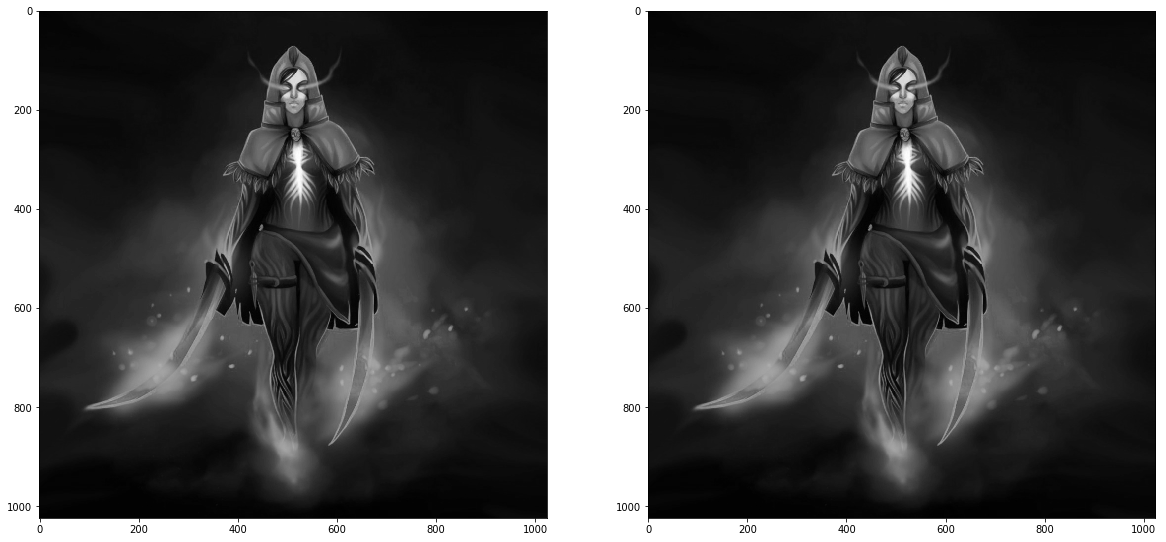

In [38]:
f, axarr = plt.subplots(1,2,figsize=(20,20))
axarr[0].imshow(image, cmap="gray")
axarr[1].imshow(LL[10], cmap="gray")

In [39]:
mse(LL[10], image)

3.2126551258215723e-27

In [40]:
import poppy
import poppy.zernike as zer

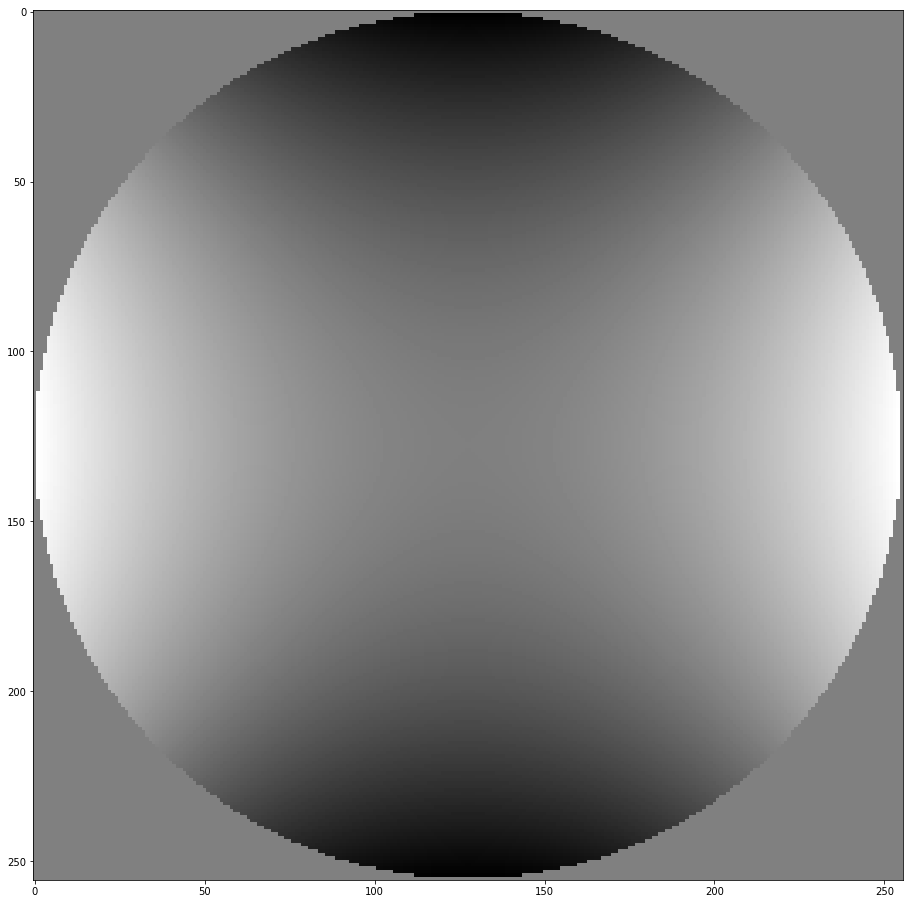

In [41]:
z = zer.zernike(2, 2, 256)

z[np.isnan(z)] = 0
f, axarr = plt.subplots(1,1,figsize=(16,16))
plt.imshow(z, cmap="gray")

In [42]:
X_z, Y_z = lib.fried_model_gradient(z)

In [43]:
X_z_H, Y_z_H = lib.Hudgin_gradien_model(z)

In [44]:
M = int(np.log2(len(z)))

In [45]:
LH = HL = HH = dict()
LH, HL, HH = analyze(X_z, Y_z, X_z_H, Y_z_H)

8


In [46]:
LL = dict()
LL[0] = np.array([[np.mean(z) * (2 ** M)]])

In [47]:
LL = syntesis(LL,LH, HL, HH, M)

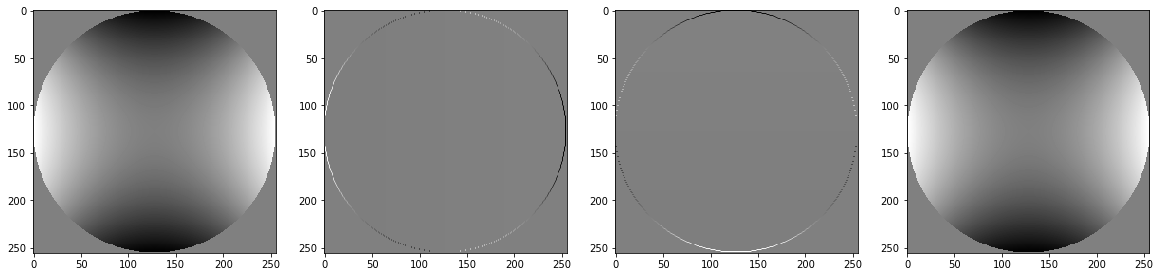

In [50]:
f, axarr = plt.subplots(1,4,figsize=(20,20))
axarr[0].imshow(z, cmap="gray")
axarr[1].imshow(X_z, cmap = 'gray')
axarr[2].imshow(Y_z, cmap = 'gray')
axarr[3].imshow(LL[8], cmap="gray")

In [51]:
mse(LL[8],z)

3.4117657322410297e-31

In [59]:
X, Y = np.mgrid[-5:5:8j, -5:5:8j]

In [60]:
X.shape

(8, 8)

In [61]:
X

array([[-5.        , -5.        , -5.        , -5.        , -5.        ,
        -5.        , -5.        , -5.        ],
       [-3.57142857, -3.57142857, -3.57142857, -3.57142857, -3.57142857,
        -3.57142857, -3.57142857, -3.57142857],
       [-2.14285714, -2.14285714, -2.14285714, -2.14285714, -2.14285714,
        -2.14285714, -2.14285714, -2.14285714],
       [-0.71428571, -0.71428571, -0.71428571, -0.71428571, -0.71428571,
        -0.71428571, -0.71428571, -0.71428571],
       [ 0.71428571,  0.71428571,  0.71428571,  0.71428571,  0.71428571,
         0.71428571,  0.71428571,  0.71428571],
       [ 2.14285714,  2.14285714,  2.14285714,  2.14285714,  2.14285714,
         2.14285714,  2.14285714,  2.14285714],
       [ 3.57142857,  3.57142857,  3.57142857,  3.57142857,  3.57142857,
         3.57142857,  3.57142857,  3.57142857],
       [ 5.        ,  5.        ,  5.        ,  5.        ,  5.        ,
         5.        ,  5.        ,  5.        ]])